<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase03/Notebooks/3c_umap_tsne_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
%pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.manifold import TSNE
import numpy as np

/home/david/.local/share/virtualenvs/MachineLearning-JX_ppze_/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%matplotlib inline

In [4]:
sns.set_theme(style="white", rc={"figure.figsize": (12, 8)})

### Pull the data from the internet


MNIST is a traditional clustering data set consisting of a set of 28x28 greyscale images of handwritten digits. We will do the traditional thing with this data a treat the greyscale images as a 28x28 = 784 long vector and compute Euclidean distance between these vectors.


In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)  # descargar mnist desde sklearn
mnist.target = mnist.target.astype(np.uint8)  # etiquetas objetivo (clases)

Each image is flattened into a single 784 long greyscale vector.


In [6]:
data = mnist["data"]
labels = mnist["target"]
data.shape

(70000, 784)

### Now let's use UMAP to embed these points into a two dimensional space.


In [7]:
fit = umap.umap_.UMAP(n_neighbors=15, metric="euclidean")
u = fit.fit_transform(data)

In [8]:
output = pd.DataFrame(u, columns=("x", "y"))
output["labels"] = labels
output.to_csv("embedding_mnist_umap1.csv")

In [9]:
pd.DataFrame(u, columns=("x", "y")).to_csv("embedding_mnist_umap.csv")

Text(0.5, 1.0, 'MNIST data embedded into two dimensions by UMAP')

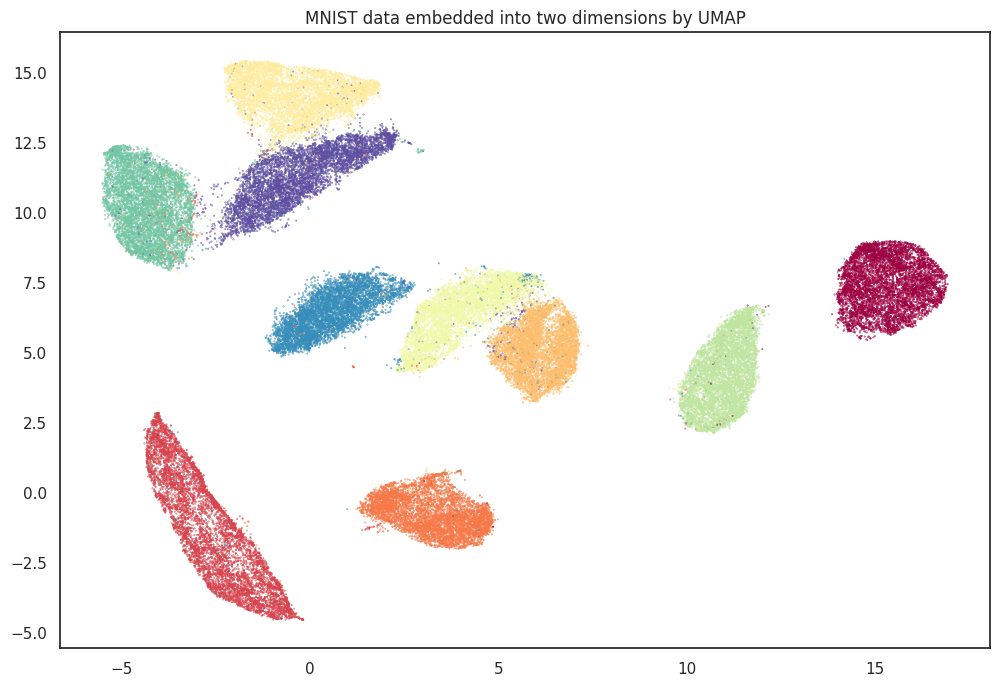

In [10]:
plt.scatter(u[:, 0], u[:, 1], c=labels, cmap="Spectral", s=0.1)
plt.title("MNIST data embedded into two dimensions by UMAP")

### T-SNE


In [11]:
fit_tsne = TSNE(n_components=2, random_state=42)
u_tsne = fit_tsne.fit_transform(data)

In [12]:
output = pd.DataFrame(u_tsne, columns=("x", "y"))
output["labels"] = labels
output.to_csv("embedding_mnist_tsne1.csv")

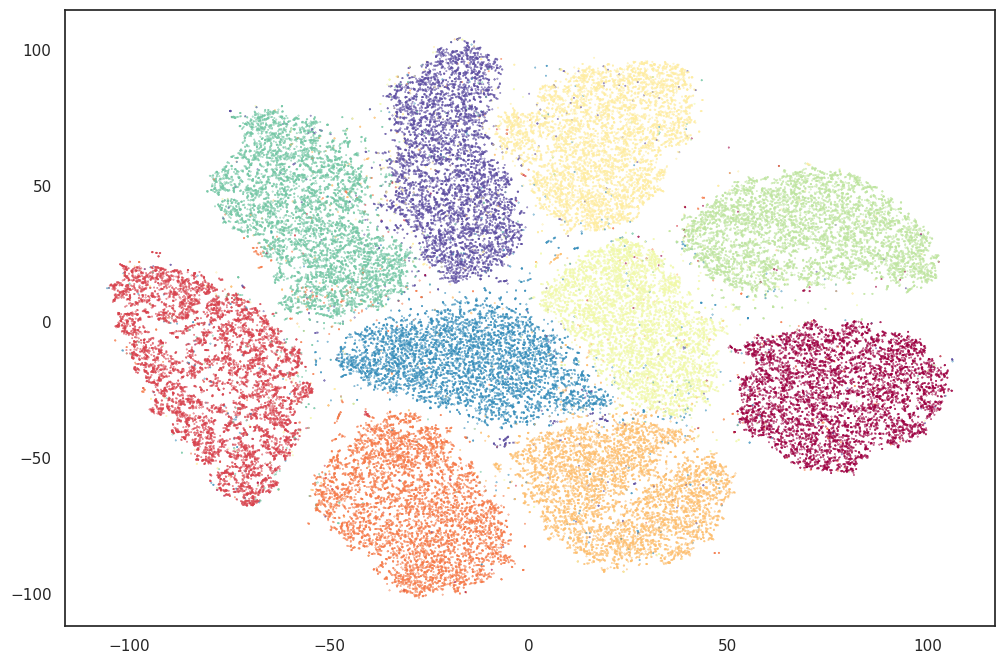

In [13]:
plt.scatter(u_tsne[:, 0], u_tsne[:, 1], c=labels, cmap="Spectral", s=0.1)

### PCA

The old standby of PCA which is blindingly fast to compute and often used as an initialization to many of the more complex algorithms. This isn't really a competitor but instead should be thought of as a strawman. Given that other algorithms initialize with these values one would hope that they can do better.


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
u_pca = pca.fit_transform(data)

CPU times: user 8.82 s, sys: 3.99 s, total: 12.8 s
Wall time: 1.35 s


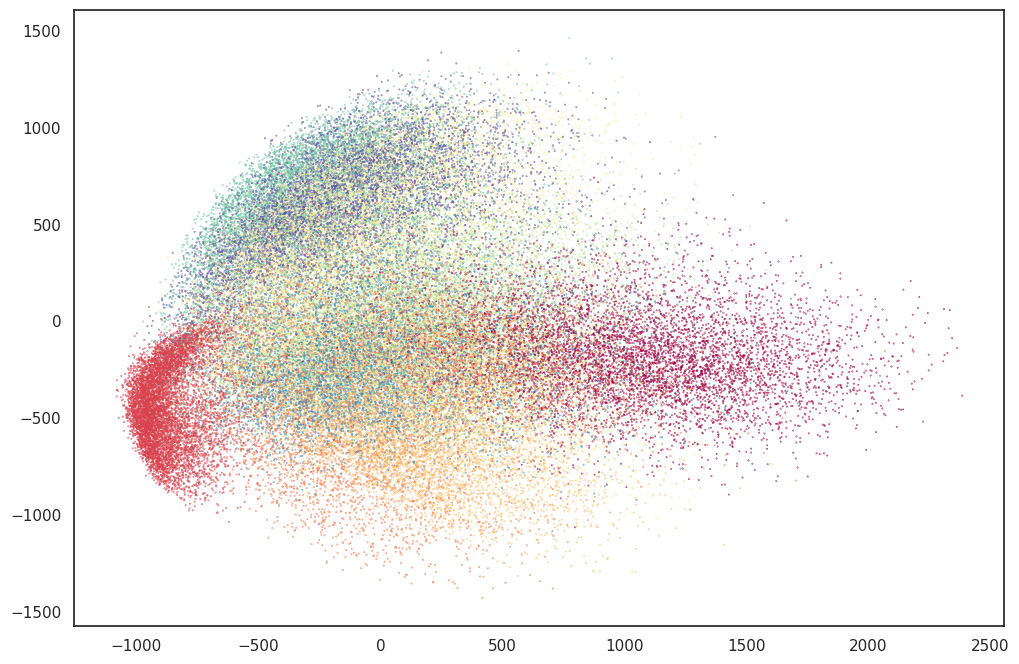

In [15]:
plt.scatter(u_pca[:, 0], u_pca[:, 1], c=labels, cmap="Spectral", s=0.1)